<center><img src="https://i.imgur.com/YNtjmbq.png" width="800"></center> 

<a target="_blank" href="https://colab.research.google.com/github/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/sesion_3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Práctica 3 – Exploración de Redes Gephi


<div class="alert alert-info" role="alert">
    
## Data para la sesión

Para esta sesión, los datos  puedes descargarlos en _tu_ carpeta **data** desde este [enlace](https://drive.google.com/drive/folders/1NZYocYRAp8FYnnPqY6UVmWBtJfOIH3Pi?usp=sharing).
</div>



### Pasos previos

Carguemos la data que vimos la sesión 1, sobre la relación entre las elites del Perú:

In [1]:
import pandas as pd
import networkx as nx

LinkPeruElite="https://docs.google.com/spreadsheets/d/e/2PACX-1vSd2qNtyh2UUtBnk9YPQn-S7861qI_VWhL97p4CLmd_fLus6u6zoo8BcpFIuydMjfKVdDfC0QEAqB0r/pub?output=xlsx"

# leer tabla (matriz)
Peru_adjMx=pd.read_excel(LinkPeruElite,index_col=0,sheet_name='adjacency')

# crear red desde la tabla (matriz)
PeruNet_AdjMx=nx.from_pandas_adjacency(Peru_adjMx) # no dirigida

La data se cargó desde una matriz de adyacencia. Como se recuerda esta red tiene **isolates**.

In [2]:
list(nx.isolates(PeruNet_AdjMx))

['Lucioni',
 'Rodriguez Rodríguez',
 'Custer',
 'Ikeda',
 'Cogorno',
 'Arias Davila']

Recordemos además la cantidad de nodos y enlaces:

In [3]:
PeruNet_AdjMx.number_of_nodes(),PeruNet_AdjMx.number_of_edges()

(37, 135)

Siendo esta una gráfica posible:

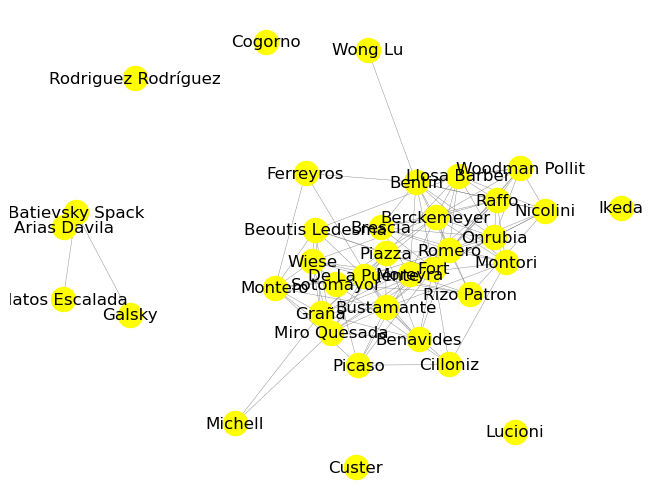

In [4]:
nodesPositions=nx.spring_layout(PeruNet_AdjMx,k=0.8) # posiciones

nx.draw(PeruNet_AdjMx,
        pos=nodesPositions,# coordenadad de los nodos
        with_labels=True,  # mostrar etiquetas de los nodos
        node_color='yellow', # color del nodo
        edge_color='grey',   # color del edge
        width=0.3)           # ancho del edge

Las redes con _aislados_ pueden significar problemas en cálculos posteriores. En alguno casos se omiten, en algunos se contabilizan, y en otros generan errores. Si la data está en una matriz, puede ser leída bien, pero si está en una edgelist u otro formato no matricial pueden suceder diversos escenarios con resultados no confiables, por lo que hay que estar atento.

Exportaré esta red en dos formatos diferentes, para verlos luego en Gephi (estos ya están en la carpeta):


In [5]:
import os

# os.path.join : indica la ubicacion
# cree la carpeta 'data' antes de este paso

filename1=os.path.join('data','PeruNet_AdjMx.gml') 
filename2=os.path.join('data','PeruNet_AdjMx.graphml') 

# guardando:
nx.write_gml(PeruNet_AdjMx,filename1)
nx.write_graphml(PeruNet_AdjMx,filename2)


## De UCINET a Gephi

Como se recuerda, UCINET abre sin problemas una matriz de adyacencia. En esta ocasión convertiremos el archivo **PeruNet_AdjMx_ucinet##**, el cual está en el link que se ha compatido, a un formato confiable para Gephi, el formato **Pajek**.

La Figura 1 nos indica dónde está el menu para iniciar la exportación a **formato Pajek**.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/pajekFromUcinet1.png?raw=true" style="width:90%">
<figcaption align = "center"> Figura 1. Ruta para convertir a Pajek. 
 </figcaption>
 Fuente: Autor.
</figure>

El menú de exportación a Pajek hace preguntas importantes. La Figura 2 nos indica las opciones que debemos elegir o escribir. De ahi se creará el archivo **PeruNet_AdjMx_ucinet.net**.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/pajekFromUcinet2.png?raw=true" style="width:90%">
<figcaption align = "center"> Figura 2. Menu de exportación a Pajek. 
 </figcaption>
 Fuente: Autor.
</figure>

Gephi puede leer diversos formatos. Pero no lee los archivos **##** de Ucinet. La Figura 3 nos indica la ruta a seguir para abrir archivos. 


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/openGephi1.png?raw=true" style="width:50%">
<figcaption align = "center"> Figura 3. Opción para abrir archivo de red en Gephi. 
 </figcaption>
 Fuente: Autor.
</figure>

Si vamos a la carpeta de datos de esta sesión veremos al archivo **PeruNet_AdjMx_ucinet.net**. La Figura 4 muestra ese y otros archivos. Ahi también están los que creamos en Python.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/openGephi2.png?raw=true" style="width:90%">
<figcaption align = "center"> Figura 4. Seleción de archivo creado por UCINET. 
 </figcaption>
 Fuente: Autor.
</figure>

Luego de abrir el archivo, Gephi ofrece un menú de configuracion mostrado en la Figura 5. Tenemos que ser explicitos respecto al tipo de relación, y, si es necesario, configurar los enlaces.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/openGephi3.png?raw=true" style="width:90%">
<figcaption align = "center"> Figura 5. Configuración del archivo Pajek  creado por UCINET. 
 </figcaption>
 Fuente: Autor.
</figure>

La Figura 6 ya nos muestra la red que Gephi ha reconocido. En la esquina superior derecha indica las cantidad de nodos y enlaces. Como se indica, debemos seleccionar un **layout** para cambiar la posición de los nodos.
<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/layoutGephi1.png?raw=true" style="width:90%">
<figcaption align = "center"> Figura 6. Vista inicial de la red. Elegir Layout para dispersar nodos. 
 </figcaption>
 Fuente: Autor.
</figure>

Si hemos elejido el layout _Fuchterman Reingold_, los nodos cambiarán de posición. Pero nota que las etiquetas de los nodos no aparecen. Los detalles se ven en la Figura 7.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/layoutGephi2.png?raw=true" style="width:90%">
<figcaption align = "center"> Figura 7. Vista de la red usando layout Fuchterman Reingold.
 </figcaption>
 Fuente: Autor.
</figure>

La Figura 8 muestra las etiquetas de los nodos. Para ello se deben usar las acciones indicadas con las flechitas, tal como se indica en esa figura.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/layoutGephi3.png?raw=true" style="width:90%">
<figcaption align = "center"> Figura 8. Vista de la red usando el layout Fuchterman Reingold con etiquetas visibles.
 </figcaption>
 Fuente: Autor.
</figure>


## Cálculos desde Gephi

A partir de este punto, haremos uso de algunos de los estadísticos que Gephi ofrece. Todos los disponibles en la instalación básica de Gephi se muestran en la zona derecha de la ventana de Gephi. La Figura 9 muestra tales opciones.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/statsGephi.png?raw=true" style="width:40%">
<figcaption align = "center"> Figura 9. Panel de estadísticos de la red.
 </figcaption>
 Fuente: Autor.
</figure>







### <div class="alert alert-success" role="alert">Average Degree </div>

Todos los  nodos tienen una cantidad de conexiones, salvo que sean isolates (grado es 0), los calcularé en Python primero:

In [6]:
degree_dict=dict(PeruNet_AdjMx.degree())
TheDegrees=pd.Series(degree_dict,name='degree')

#aqui están
TheDegrees

Romero                 18
Graña                  11
Miro Quesada           11
Moreyra                15
Fort                   19
De La Puente           14
Wiese                   9
Onrubia                11
Brescia                 8
Nicolini                8
Montero                 9
Picaso                  6
Bentin                 13
Benavides               7
Bustamante             13
Woodman Pollit          8
Raffo                  11
Piazza                  9
Berckemeyer            13
Llosa Barber           10
Beoutis Ledesma         8
Rizo Patron             7
Montori                 9
Sotomayor               8
Cilloniz                5
Ferreyros               3
Michell                 2
Wong Lu                 1
Batievsky Spack         2
Matos Escalada          1
Galsky                  1
Lucioni                 0
Rodriguez Rodríguez     0
Custer                  0
Ikeda                   0
Cogorno                 0
Arias Davila            0
Name: degree, dtype: int64

Se nota que las islas tiene degree 0. Ahora, si sacamos un promedio de los valores obtenidos, obtendremos:

In [7]:
TheDegrees.mean()

7.297297297297297

La distribución de los grados será:

In [8]:
distribucionGrados=TheDegrees.value_counts().sort_index()
distribucionGrados

0     6
1     3
2     2
3     1
5     1
6     1
7     2
8     5
9     4
10    1
11    4
13    3
14    1
15    1
18    1
19    1
Name: degree, dtype: int64

Gráfiquemos esa distribución:

<Axes: ylabel='degree'>

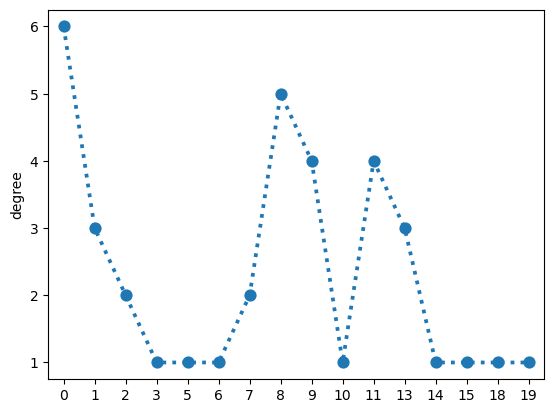

In [9]:
import seaborn as sns
sns.pointplot(distribucionGrados,linestyles='dotted')

En Gephi, si ejecutamos (_Run_) la función _Average Degree_ obtenemos resultados similares a los de Python, como se ve en la Figura 10.


<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/AverageDegree_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 10. Calculo del grado promedio en Gephi. 
 </figcaption>
 Fuente: Autor.
</figure>


### <div class="alert alert-success" role="alert">Diameter </div>

La sesión anterior presentamos el concepto de diámetro. Si calculamos la menor distancia entre todos los nodos, el diámetro es la mayor de ellas.
<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/diameter.png" style="width:70%">
<figcaption align = "center"> Figura 11. Ejemplo de Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>

Networkx sólo calcula diámetro en un grafo conectado, y la red tiene varios componentes, por ello esto no funcionaría:

In [10]:
# nx.diameter(PeruNet_AdjMx)

Lo que queda, es calcular el diámetro del mayor componente de la red (que llamaremos: **PeruNet_AdjMx_bigger**):

In [11]:
PeruNet_AdjMx_nodesInBig = sorted(nx.connected_components(PeruNet_AdjMx), key=len, reverse=True)

PeruNet_AdjMx_bigger=PeruNet_AdjMx.subgraph(PeruNet_AdjMx_nodesInBig[0])

#diametro del componente mayor
nx.diameter(PeruNet_AdjMx_bigger)

4

El diámetro se haya de entre los distancias mínimas entre todos los nodos, por lo que también podemos saber el promedio de todas esas distancias:

In [12]:
nx.average_shortest_path_length(PeruNet_AdjMx_bigger)

1.7407407407407407

Un concepto asociado es la **excentricidad**: La excentricidad de un nodo (vértice) v en un grafo (red) conexo es la máxima distancia geodésica (camino más corto) desde v a cualquier otro nodo en el grafo. 
Calculemos la excentricidad de todos nuestros nodos:

In [13]:
eccentricity_dict=nx.eccentricity(PeruNet_AdjMx_bigger)
eccentricity=pd.Series(eccentricity_dict,name='eccentricity')
eccentricity.sort_values()

Romero             2
Fort               2
Ferreyros          3
Cilloniz           3
Sotomayor          3
Montori            3
Rizo Patron        3
Beoutis Ledesma    3
Llosa Barber       3
Berckemeyer        3
Piazza             3
Raffo              3
Woodman Pollit     3
Bustamante         3
Benavides          3
Bentin             3
Picaso             3
Montero            3
Nicolini           3
Brescia            3
Onrubia            3
Wiese              3
De La Puente       3
Moreyra            3
Miro Quesada       3
Graña              3
Michell            4
Wong Lu            4
Name: eccentricity, dtype: int64

De ahi que el diámetro es la mayor excentricidad. De la excentricidad se desprende el concepto de radio de la red, la menor excentricidad.

In [14]:
 nx.radius(PeruNet_AdjMx_bigger)

2

Nótese que Python calcula todas las métricas de distancia sólo en redes conectadas.

Gephi ofrece el calculo del diámetro de la red, y como veremos, lo hace con redes que no estén conectadas. Como indica la Figura 12, antes nos pide si deseamos normalizar los resultados de _otros_ indicadores (dos de ellos ya los vimos la sesión anterior).

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/Diameter_gephi1.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 12. Cálculo del Diámetro en Gephi. 
 </figcaption>
 Fuente: Autor.
</figure>

Gephi calcula el diámetro y otros indicadores. 
<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/Diameter_gephi2.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 13. Diámetro y otros indicadores calculados por Gephi. 
 </figcaption>
 Fuente: Autor.
</figure>

### <div class="alert alert-success" role="alert">Density </div>

De la sesión anterior, sabemos que la densidad nos indica que tan cerca está nuestra red de ser un grafo completo (con todas las conexiones posibles. oase diámetro 1). La Figura 14 muestra un grafo completo (máxima densidad) y uno de baja densidad (a la izquierda).

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/density.png" style="width:70%">
<figcaption align = "center"> Figura 14. Densidades en las redes. 
 </figcaption>
 <a href="https://medium.com/@jane.vdplas/https-medium-com-protium-digital-what-are-network-effects-4f1ec159b6">Fuente: Medium</a>
</figure>


Python calcula sin problema la densidad para toda la red:

In [15]:
nx.density(PeruNet_AdjMx)

0.20270270270270271

Gephi obtiene un resultado similar (redondeado). Como muestra la Figura 15, es el único resultado que se reporta.
<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/Density_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 15. Diámetro. 
 </figcaption>
 Fuente: Autor.
</figure>

### <div class="alert alert-success" role="alert">Link analysis </div>

En esta sesión presentamos dos métricas más:
1. HITS  
2. PageRank  

Ambos son algoritmos para detectar nodos relevantes en la red, y van más allá del simple hecho de tener muchas conexiones. Estos algoritmos están planteados para redes dirigidas, e inspirados en cómo un buscador web sugiere otras páginas.

#### <div class="alert alert-warning" role="alert">HITS</div>

El algoritmo HITS busca calificar un nodo si es buen HUB o buena AUTHORITY. Serás mejor HUB si envías link a buenos AUTHORITIES, y serás buen AUTHORITY si recibes links de buenos HUBS. De ahi que cada nodo tiene una puntuación para cada caso. Si la red es NO dirigida, la puntuación es la misma (no es tan útil). La Figura 16 representa el concepto.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/HITs_concept.jpg?raw=true" style="width:70%">
<figcaption align = "center"> Figura 16. Diámetro. 
 </figcaption>
 Fuente: <a href="https://morioh.com/a/4ddf039d228a/what-is-the-hits-algorithm">morioh.com</a>
</figure>

En Python puedes calcularlo así:

In [16]:
# calculando ambos
h_dict,a_dict=nx.hits(PeruNet_AdjMx)

# dando formato
HITS_hubs=pd.Series(h_dict,name='HITS_hubs').round(4)/2
HITS_authorities=pd.Series(a_dict,name="HITS_authorities").round(4)/2
pd.concat([HITS_hubs,HITS_authorities],axis=1)

,HITS_hubs,HITS_authorities
Romero,0.03365,0.03365
Graña,0.01905,0.01905
Miro Quesada,0.01905,0.01905
Moreyra,0.02780,0.02780
Fort,0.03295,0.03295
De La Puente,0.02535,0.02535
Wiese,0.01540,0.01540
Onrubia,0.02280,0.02280
Brescia,0.01835,0.01835
Nicolini,0.01670,0.01670


La Figura 17 muestra la opción en Gephi.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/hits_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 17. HITS en Gephi.
 </figcaption>
 Fuente: Autor.
</figure>

#### <div class="alert alert-warning" role="alert">PageRank</div>

Este algoritmo es similar a HITS, pero sólo calcula un valor, no dos. Así, califica a cada nodo según la calidad y cantidad de sus conexiones entrantes. La Figura 18 ejemplifica el concepto.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/pageRank_concept.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 18. PageRank. 
 </figcaption>
 Fuente: <a href="https://medium.com/@anouar_bakouch/the-pagerank-algorithm-googles-favorite-algorithm-c7403446bc2e">medium.com</a>
</figure>

En Python, podemos calcularlo así:

In [17]:
# calculando ambos
pagerank_dict=nx.pagerank(PeruNet_AdjMx)

# dando formato
Pagerank=pd.Series(pagerank_dict,name='Pagerank')
Pagerank.sort_values()

Arias Davila           0.004702
Ikeda                  0.004702
Custer                 0.004702
Rodriguez Rodríguez    0.004702
Cogorno                0.004702
Lucioni                0.004702
Wong Lu                0.007625
Michell                0.010393
Ferreyros              0.013314
Cilloniz               0.018829
Picaso                 0.021713
Rizo Patron            0.023740
Benavides              0.023760
Galsky                 0.024151
Matos Escalada         0.024151
Brescia                0.026231
Woodman Pollit         0.026356
Nicolini               0.026566
Beoutis Ledesma        0.026897
Sotomayor              0.027214
Piazza                 0.029448
Montori                0.029589
Wiese                  0.029880
Montero                0.030965
Llosa Barber           0.032069
Raffo                  0.034687
Onrubia                0.034687
Miro Quesada           0.036821
Graña                  0.036821
Berckemeyer            0.040541
Bustamante             0.042278
De La Pu

Gephi lo calcula facilmente, como indica la Figura 19.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/page_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 19. PageRank en Gephi. 
 </figcaption>
 Fuente: Autor.
</figure>

## <div class="alert alert-success" role="alert">Connected components </div>

La sesión anterior definimos como "red conectada" a la red cuyos nodos pueden comunicarse unos a otros. Las redes dirigidas que cumplen ello son "fuertemente conectadas", y se les llama "débilmente conectadas" si no se considera la dirección. Las NO dirigidas son conectadas si son un único componente, cuando tienen otros componentes que satelitan, ya son no conectadas. La Figura 20 lo ejemplifica.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_2/raw/main/picsForSession/strongly_connected.png" style="width:40%">
<figcaption align = "center"> Figura 20. Red y componentes fuertemente conectados </figcaption>
    Fuente:<a href="https://en.wikipedia.org/wiki/Strongly_connected_component" class="alert-link">Wikipedia</a>
</figure>

En Python sabemos quienes con los componentes conectados así:

In [18]:
nx.is_connected(PeruNet_AdjMx),nx.is_connected(PeruNet_AdjMx_bigger)

(False, True)

Estas funciones son sólo para redes no dirigidas, si fueran dirigidas se usa **is_strongly_connected()**, (o _weakly_).

In [19]:
nx.number_connected_components(PeruNet_AdjMx)

8

En Python ves así los componentes:

In [20]:
list(nx.connected_components(PeruNet_AdjMx))

[{'Benavides',
  'Bentin',
  'Beoutis Ledesma',
  'Berckemeyer',
  'Brescia',
  'Bustamante',
  'Cilloniz',
  'De La Puente',
  'Ferreyros',
  'Fort',
  'Graña',
  'Llosa Barber',
  'Michell',
  'Miro Quesada',
  'Montero',
  'Montori',
  'Moreyra',
  'Nicolini',
  'Onrubia',
  'Piazza',
  'Picaso',
  'Raffo',
  'Rizo Patron',
  'Romero',
  'Sotomayor',
  'Wiese',
  'Wong Lu',
  'Woodman Pollit'},
 {'Batievsky Spack', 'Galsky', 'Matos Escalada'},
 {'Lucioni'},
 {'Rodriguez Rodríguez'},
 {'Custer'},
 {'Ikeda'},
 {'Cogorno'},
 {'Arias Davila'}]

Así le podemos asignar un numero al componente:

In [21]:
components_dict={u:i for i,node_set in enumerate(nx.connected_components(PeruNet_AdjMx)) for u in node_set}

components=pd.Series(components_dict,name='components')
components

Bustamante             0
Benavides              0
Moreyra                0
Sotomayor              0
Wiese                  0
Nicolini               0
Llosa Barber           0
Graña                  0
Raffo                  0
Onrubia                0
Romero                 0
Cilloniz               0
De La Puente           0
Wong Lu                0
Montori                0
Picaso                 0
Fort                   0
Bentin                 0
Woodman Pollit         0
Rizo Patron            0
Beoutis Ledesma        0
Berckemeyer            0
Ferreyros              0
Brescia                0
Michell                0
Piazza                 0
Miro Quesada           0
Montero                0
Galsky                 1
Batievsky Spack        1
Matos Escalada         1
Lucioni                2
Rodriguez Rodríguez    3
Custer                 4
Ikeda                  5
Cogorno                6
Arias Davila           7
Name: components, dtype: int64

De lo anterior, podemos ver la distribución de la cantidad de nodos en cada componente:

In [22]:
components.value_counts().value_counts().sort_index()

1     6
3     1
28    1
Name: components, dtype: int64

La Figura 21 indica cómo Gephi calculará los componentes de la red.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/connected_gephi.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 21. Menú de componentes conectados. </figcaption>
    Fuente:Autor.
</figure>

Los resultados se muestran en la Figura 22.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/connected_gephi2.png?raw=true" style="width:90%">
<figcaption align = "center"> Figura 22. Calculo de los componentes conectados en Gephi </figcaption>
    Fuente:Autor.
</figure>

Hemos calculado diversas métricas en Python, y podríamos guardarlas en un solo documento. Primero calculemos las medidas de centralidad clásicas de Gephi, dos de las que se vieron la sesión anterior:

In [23]:
closeness_centrality_dict=nx.closeness_centrality(PeruNet_AdjMx)
betweenness_centrality_dict=nx.betweenness_centrality(PeruNet_AdjMx)

closeness_centrality= pd.Series(closeness_centrality_dict,name='closeness_centrality')
betweenness_centrality= pd.Series(betweenness_centrality_dict,name='betweenness_centrality')

Ahora juntemos estas medidas y las anteriores:

In [24]:
# lista de medidas calculadas
medidas=[TheDegrees, eccentricity, closeness_centrality,betweenness_centrality, HITS_authorities,HITS_hubs, Pagerank,components] 

# data frame con todo
medidasElite=pd.concat(medidas,axis=1).fillna(0) # 0 si hay vacíos
medidasElite

,degree,eccentricity,closeness_centrality,betweenness_centrality,HITS_authorities,HITS_hubs,Pagerank,components
Romero,18,2.0,0.562500,0.056915,0.03365,0.03365,0.054450,0
Graña,11,3.0,0.460227,0.024154,0.01905,0.01905,0.036821,0
Miro Quesada,11,3.0,0.460227,0.024154,0.01905,0.01905,0.036821,0
Moreyra,15,3.0,0.506250,0.036533,0.02780,0.02780,0.046401,0
Fort,19,2.0,0.578571,0.086449,0.03295,0.03295,0.058120,0
De La Puente,14,3.0,0.493902,0.021758,0.02535,0.02535,0.043653,0
Wiese,9,3.0,0.440217,0.009827,0.01540,0.01540,0.029880,0
Onrubia,11,3.0,0.460227,0.003532,0.02280,0.02280,0.034687,0
Brescia,8,3.0,0.430851,0.000416,0.01835,0.01835,0.026231,0
Nicolini,8,3.0,0.421875,0.003122,0.01670,0.01670,0.026566,0


Estas medidas ya fueron calculadas y guardadas por Gephi y se ven en **Data Laboratory**, como se muestra en la Figura 23.




<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/medidasGephiAll.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 22. Gephi ha almacenado todas las medidas calculadas en su zona Data Laboratory </figcaption>
    Fuente:Autor.
</figure>

Estas métricas están en este [documento de Google](https://docs.google.com/spreadsheets/d/13mREQUVM55sdd68UUwIGHvqceNRQHP7yhf_E86MC2gQ/edit?usp=sharing)

<div class="alert-success">

## Ejercicio

1. Importar la red SeattleTop (red dirigida) en Gephi
2. Hacer todos los calculos vistos.
3. Descargar todos los cálculos. La Figura 23 muestra cómo descargarlos.

<figure>
<img src="https://github.com/MAGALLANESJoseManuel/MGPIT_Pol748_Redes_3/blob/main/picsForSession/Descargar.png?raw=true" style="width:70%">
<figcaption align = "center"> Figura 23. Proceso para descargar métricas de la red (nodos). 
 </figcaption>
 Fuente: UCINET
</figure>

4. Abra ese archivo en cualquier programa estadístico.
5. Use formato condicional para asignar los valores a escalas de colores. Describa lo más notorio.


_Prepara su respuesta con texto e imagenes de lo obtenido en un GoogleDoc_.

</div>